# Fashion-MNIST Classification

## Импорты

Сделано в гугл колабе, поэтому:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

## Загрузка и предобработка данных

In [8]:
DATA_PATH = "/content/drive/MyDrive/data"
SUBMISSION_PATH = "/content/drive/MyDrive/data/DeepLearning_submissions"

In [9]:
df_test = pd.read_csv(f"{DATA_PATH}/fmnist_test.csv")
df_test = df_test.drop("Id", axis=1)
df_train = pd.read_csv(f"{DATA_PATH}/fmnist_train.csv")
df_train = df_train.drop(labels="Id", axis=1)
df_sample_submission = pd.read_csv(f"{DATA_PATH}/sample_submission.csv")

Посмотрим на тестовый датасет:

In [10]:
df_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Проверим на наличие нанов:

In [11]:
df_test.isna().sum().sum()

0

Нанов нет.

Посмотрим на тренировочный датасет:

In [12]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,195.0,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17038,6,0,0,0,0,0,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Займемся предварительной обработкой:
* Удалим строки с NaN
* Создадим столбец с текстовыми названиями классов 
* Переделаем порядок столбцов
* Переведем все числовые значения в инты

Текстовые названия и их номера:
0. T-shirt/top – футболка
1. Trouser – брюки
2. Pullover – свитер
3. Dress – платье
4. Coat – пальто
5. Sandal – сандалия
6. Shirt – рубашка
7. Sneaker – кроссовок
8. Bag – сумка
9. Ankle boot – сапог

In [13]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

df_train_nona = df_train.copy()
df_train_nona.dropna(inplace=True)

df_train_nona["name"] = df_train_nona["label"].apply(
    lambda x: class_names[x]
)

new_cols = [df_train_nona.columns[-1]] + list(df_train_nona.columns[:-1])
df_train_nona = df_train_nona[new_cols]
df_train_nona[new_cols[1:]] = df_train_nona[new_cols[1:]].astype(int)
display(df_train_nona)
display(df_train_nona.info())

,name,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17034,Trouser,1,0,0,0,0,0,0,0,0,...,120,22,0,0,0,0,0,0,0,0
17035,Coat,4,0,0,0,0,0,0,0,1,...,195,186,16,0,2,0,0,0,0,0
17036,Coat,4,0,0,0,0,0,0,5,4,...,0,0,33,48,37,3,0,0,0,0
17037,Coat,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17039 entries, 0 to 17038
Columns: 786 entries, name to pixel784
dtypes: int64(785), object(1)
memory usage: 102.3+ MB


None

Удалился только один пример с нанами, отлично.

Теперь посмотрим на то, как выглядят картинки из датасета. Цвет подберем не серый, чтобы было немного поинтереснее:

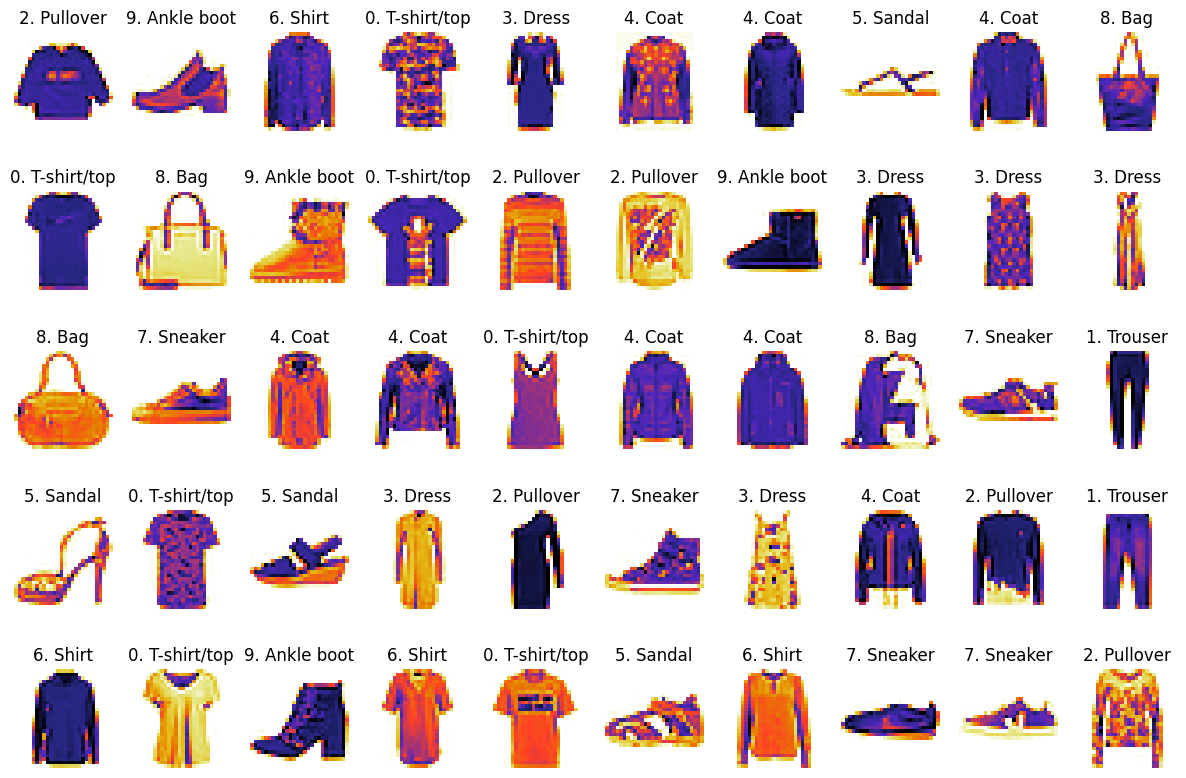

In [14]:
plt.figure(figsize=(15, 10))
for N in range(50):
    ax = plt.subplot(5, 10, N + 1)
    plt.imshow(
        df_train_nona.loc[:, "pixel1":].values[N].reshape(28, 28), 
        cmap="CMRmap_r"
    )
    plt.title(
        f'{df_train_nona["label"].values[N]}.'
        f' {df_train_nona["name"].values[N]}'
    )
    plt.axis("off");

Сформируем тренировочный датасет:

In [15]:
X_flat = df_train_nona.loc[:, "pixel1":].values
y = df_train_nona["label"].values
print("X_flat:")
display(X_flat)
display(X_flat.shape)
print()
print("y:")
display(y)
display(y.shape)

X_flat:


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(17039, 784)


y:


array([2, 9, 6, ..., 4, 4, 6])

(17039,)

Сформируем тестовый датасет:

In [16]:
X_test_flat = df_test.values
display(X_test_flat)
display(X_test_flat.shape)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(10000, 784)

# KERAS Xception Network

## Предобработка данных

Сформируем массивы 28 * 28 из плоских векторов:

In [17]:
X_shaped = X_flat.reshape(17039, 28, 28)
X_test_shaped = X_test_flat.reshape(10000, 28, 28)

print(X_shaped.shape)
print(X_test_shaped.shape)

(17039, 28, 28)
(10000, 28, 28)


Переведем метки классов в понятный нейросетке массив с вероятностью каждого класса:

In [18]:
y_keras = []
for label in y:
    array = np.zeros(10)
    array[label] = 1
    y_keras.append(array)
y_keras = np.array(y_keras)
y_keras

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_shaped, 
    y_keras, 
    test_size=0.1, 
    random_state=1337
)

## Прописываем нейросеть

In [19]:
augmentation_network = tf.keras.Sequential(
    [
        # Тоже слои, но реализуют детерминированные алгоритмы.
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [20]:
# Метод для создания модели Xception network.
def build_xception_network(input_shape, num_classes):
    inputs = tf.keras.Input(shape = input_shape)

    # Наращивание можно сделать частью архитектуры нейронной сети.
    x = augmentation_network(inputs)

    x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    previous_block_activation = x

    for size in [128, 256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])
        previous_block_activation = x

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)

## Обучение нейросети

In [22]:
xception_network_fashion = build_xception_network(
    input_shape = (28, 28) + (1,), 
    num_classes = 10
)

Разобьем на тренировочную и валидационную выборки:

In [23]:
# Обучаем нейронную сеть.
# (!) Долгий процесс.
EPOCHS = 40

# callback для сохранения результатов обучения в формате Keras (h5) после каждой эпохи обучения.
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        f"{DATA_PATH}"
        "/xception_network_fashion_checkpoints/epoch_{epoch}.h5"
    )
]
xception_network_fashion.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model_history = xception_network_fashion.fit(
    x=X_train, 
    y=y_train, 
    epochs=EPOCHS, 
    callbacks=callbacks,
    validation_data=(X_valid, y_valid)
)
# Сохраняем модель целиком в формате TensorFlow (saved_model.pb + variables/).
xception_network_fashion.save("xception_network_fashion");

Epoch 1/40
480/480 [==============================] - 29s 19ms/step - loss: 0.1066 - accuracy: 0.7902 - val_loss: 0.2750 - val_accuracy: 0.4272
Epoch 2/40
480/480 [==============================] - 7s 15ms/step - loss: 0.0710 - accuracy: 0.8607 - val_loss: 0.0689 - val_accuracy: 0.8574
Epoch 3/40
480/480 [==============================] - 8s 16ms/step - loss: 0.0586 - accuracy: 0.8853 - val_loss: 0.0938 - val_accuracy: 0.8292
Epoch 4/40
480/480 [==============================] - 8s 16ms/step - loss: 0.0515 - accuracy: 0.8999 - val_loss: 0.0754 - val_accuracy: 0.8644
Epoch 5/40
480/480 [==============================] - 7s 15ms/step - loss: 0.0467 - accuracy: 0.9096 - val_loss: 0.0712 - val_accuracy: 0.8638
Epoch 6/40
480/480 [==============================] - 8s 16ms/step - loss: 0.0422 - accuracy: 0.9172 - val_loss: 0.0641 - val_accuracy: 0.8709
Epoch 7/40
480/480 [==============================] - 7s 14ms/step - loss: 0.0363 - accuracy: 0.9322 - val_loss: 0.0857 - val_accuracy: 0.862

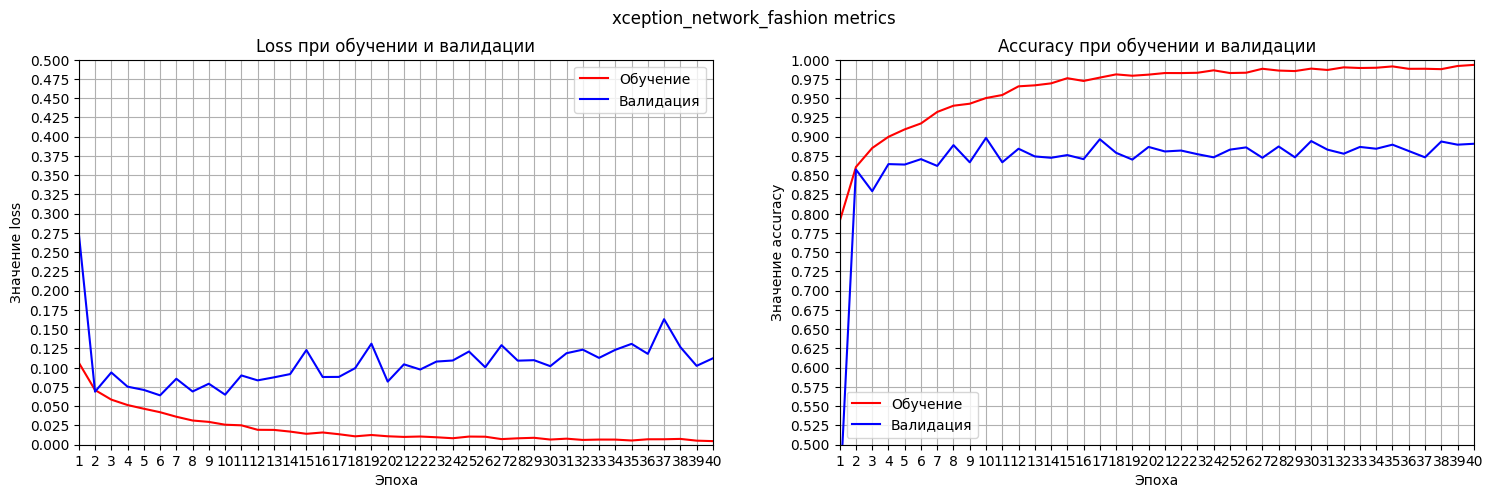

In [26]:
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
epoch = np.array(model_history.epoch) + 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('xception_network_fashion metrics')

ax1.plot(epoch, loss, "r", label="Обучение")
ax1.plot(epoch, val_loss, "b", label="Валидация")
ax1.set_title("Loss при обучении и валидации")
ax1.set_xlabel("Эпоха")
ax1.set_xticks(range(1, EPOCHS + 1))
ax1.set_yticks(np.arange(0, 2, 0.025))
ax1.set_ylabel("Значение loss")
ax1.set_xlim([1, 40])
ax1.set_ylim([0, 0.5])
ax1.grid()
ax1.legend()

ax2.plot(epoch, accuracy, "r", label="Обучение")
ax2.plot(epoch, val_accuracy, "b", label="Валидация")
ax2.set_title("Accuracy при обучении и валидации")
ax2.set_xlabel("Эпоха")
ax2.set_xticks(range(1, EPOCHS + 1))
ax2.set_yticks(np.arange(0, 2, 0.025))
ax2.set_ylabel("Значение accuracy")
ax2.set_xlim([1, 40])
ax2.set_ylim([0.5, 1])
ax2.legend()
ax2.grid()
fig.show()

## Предсказание на тестовых данных

Загружаем 10 эпоху (вроде бы лучшее соотношение параметров):

In [27]:
xception_network_fashion.load_weights(
    f"{DATA_PATH}"
    "/xception_network_fashion_checkpoints/epoch_10.h5"
)

In [28]:
y_pred_keras = xception_network_fashion.predict(X_test_shaped)

313/313 [==============================] - 2s 4ms/step


In [29]:
y_prediction = []
for array in y_pred_keras:
    y_prediction.append(np.argmax(array))

print(y_prediction[:10])

[0, 1, 2, 3, 3, 6, 8, 6, 5, 0]


10000
[0, 1, 2, 3, 3, 6, 8, 6, 5, 0, 3, 4, 4, 6, 8]


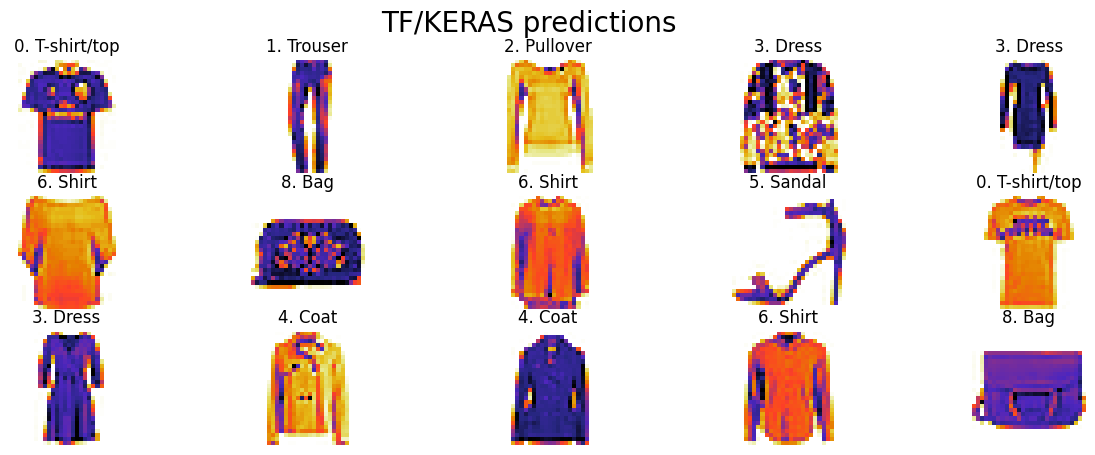

In [30]:
N_PREDICTIONS = 15

print(len(y_prediction))
print(y_prediction[:N_PREDICTIONS])

fig = plt.figure(figsize=(15, 5))
fig.suptitle("TF/KERAS predictions", fontsize=20)
for N in range(N_PREDICTIONS):
    ax = fig.add_subplot(3, 5, N + 1)
    ax.imshow(X_test_flat[N].reshape(28, 28), cmap="CMRmap_r")
    ax.set_title(f"{y_prediction[N]}. {class_names[y_prediction[N]]}")
    ax.axis("off");

## Выгрузка решения

In [31]:
df_sample_submission_keras = pd.read_csv(f"{DATA_PATH}/sample_submission.csv")
df_sample_submission_keras["Category"] = y_prediction
df_sample_submission_keras = df_sample_submission_keras.drop("label", axis=1)
df_sample_submission_keras.index = df_sample_submission_keras["Id"]
df_sample_submission_keras = df_sample_submission_keras.drop("Id", axis=1)

In [32]:
df_sample_submission_keras.to_csv(f"{SUBMISSION_PATH}/submission_keras_18.csv")

Результат (не лучший, но пусть будет как наиболее воспроизводимый):

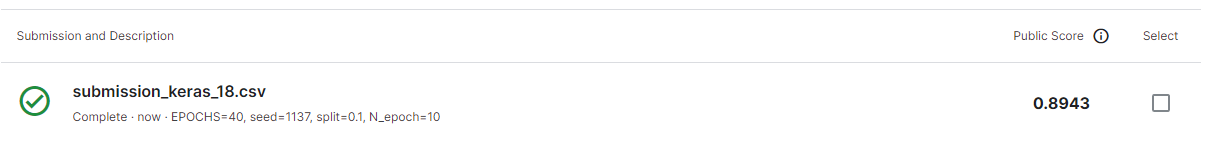